In [ ]:
import pandas as pd

In [ ]:
path =r'C:\Users\97250\Desktop\corona_tested_individuals_ver_0095.csv'

In [ ]:
data = pd.read_csv(path)

In [49]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,20/12/2020,0,0,0,0,0,שלילי,No,זכר,Other
1,20/12/2020,0,0,0,0,0,שלילי,Yes,נקבה,Other
2,20/12/2020,0,0,0,0,0,אחר,Yes,נקבה,Other
3,20/12/2020,0,0,0,0,0,שלילי,Yes,זכר,Other
4,20/12/2020,0,0,0,0,0,שלילי,No,זכר,Other
...,...,...,...,...,...,...,...,...,...,...
1048570,22/10/2020,0,0,0,0,0,שלילי,No,זכר,Other
1048571,22/10/2020,0,0,0,0,0,שלילי,Yes,נקבה,Other
1048572,22/10/2020,0,0,0,0,0,שלילי,No,זכר,Other
1048573,22/10/2020,0,0,0,0,0,שלילי,No,זכר,Other


In [ ]:
positive = data[data['corona_result']=='חיובי']
negative = data[data['corona_result']=='שלילי']

In [ ]:
positive.groupby('cough').count()['fever']

In [87]:
# No cough - 26998 , With cough - 8397.

In [ ]:
negative.groupby('cough').count()['fever']

In [ ]:
# No cough - 975569 , With cough - 12005.

In [ ]:
26998/(8397+26998)*100>70

In [ ]:
12005/(12005+975569)*100<30

In [ ]:
# Yes ,your claim is True!

In [90]:
def claimPos(withSymptoms,noSymptoms):
    if withSymptoms/(withSymptoms+noSymptoms)>0.7 :
        return True

In [91]:
def claimNeg(withSymptoms,noSymptoms):
    if noSymptoms/(withSymptoms+noSymptoms)<0.3 :
        return True

In [60]:
sympthoms = ['cough','fever', 'sore_throat', 'shortness_of_breath', 'head_ache']

In [92]:
for sympthom in sympthoms:
    
    positiveCol  = positive.groupby(sympthom).count()['gender']
    negativeCol  = negative.groupby(sympthom).count()['gender']
    
    print('Positive in test \n',positiveCol,'\n')
    print('Negative in test \n',negativeCol)
    
    if claimPos(positiveCol[0], positiveCol[1]) and claimNeg(negativeCol[0], negativeCol[1]):
        print("\n The feature: ",sympthom, " can identify between ill and healthy!")
    else:
        print("\n The feature: ",sympthom, " is not identifiable")
    
    print('\n\n')

Positive in test 
 cough
0    26894
1     8384
Name: gender, dtype: int64 

Negative in test 
 cough
0    971581
1     11986
Name: gender, dtype: int64

 The feature:  cough  can identify between ill and healthy!



Positive in test 
 fever
0    29123
1     6155
Name: gender, dtype: int64 

Negative in test 
 fever
0    975869
1      7698
Name: gender, dtype: int64

 The feature:  fever  can identify between ill and healthy!



Positive in test 
 sore_throat
0    31463
1     3815
Name: gender, dtype: int64 

Negative in test 
 sore_throat
0    982423
1      1144
Name: gender, dtype: int64

 The feature:  sore_throat  can identify between ill and healthy!



Positive in test 
 shortness_of_breath
0    34173
1     1105
Name: gender, dtype: int64 

Negative in test 
 shortness_of_breath
0    983276
1       291
Name: gender, dtype: int64

 The feature:  shortness_of_breath  can identify between ill and healthy!



Positive in test 
 head_ache
0    27191
1     8087
Name: gender, dtype: int6

In [62]:
positive.groupby('gender').count()['fever']

gender
זכר     16821
נקבה    18457
Name: fever, dtype: int64

In [63]:
negative.groupby('gender').count()['fever']

gender
זכר     493305
נקבה    490262
Name: fever, dtype: int64

In [64]:
positive.groupby('age_60_and_above').count()['fever']

age_60_and_above
No     28842
Yes     4892
Name: fever, dtype: int64

In [65]:
negative.groupby('age_60_and_above').count()['fever']

age_60_and_above
No     793561
Yes    136395
Name: fever, dtype: int64

In [71]:
for ageOver60 in  ['Yes','No']:
    data2 = data[data['age_60_and_above']==ageOver60]
        
    for gender in ['נקבה','זכר']:
        data3 = data2[data2['gender']==gender]

        for coronaResult in ['חיובי','שלילי','אחר']:
            data4 = data3[data3['corona_result']==coronaResult]

            # Data4 is -as of now- answers 3 conditions
            for sympthom in sympthoms:

                print("THE DATA FOR FEATURES:")
                print("AgeOver60: ",ageOver60)
                print("gender:",gender)
                print("coronaResult:",coronaResult)
                print(data4.groupby(sympthom).count()['test_date'])
                print()
                
            print()
            print()
            
        print()
        print()
        
    print()
    print()

THE DATA FOR FEATURES:
AgeOver60:  Yes
gender: נקבה
coronaResult: חיובי
cough
0    1567
1     878
Name: test_date, dtype: int64

THE DATA FOR FEATURES:
AgeOver60:  Yes
gender: נקבה
coronaResult: חיובי
fever
0    1976
1     469
Name: test_date, dtype: int64

THE DATA FOR FEATURES:
AgeOver60:  Yes
gender: נקבה
coronaResult: חיובי
sore_throat
0    2180
1     265
Name: test_date, dtype: int64

THE DATA FOR FEATURES:
AgeOver60:  Yes
gender: נקבה
coronaResult: חיובי
shortness_of_breath
0    2326
1     119
Name: test_date, dtype: int64

THE DATA FOR FEATURES:
AgeOver60:  Yes
gender: נקבה
coronaResult: חיובי
head_ache
0    1932
1     513
Name: test_date, dtype: int64



THE DATA FOR FEATURES:
AgeOver60:  Yes
gender: נקבה
coronaResult: שלילי
cough
0    66832
1      630
Name: test_date, dtype: int64

THE DATA FOR FEATURES:
AgeOver60:  Yes
gender: נקבה
coronaResult: שלילי
fever
0    67111
1      351
Name: test_date, dtype: int64

THE DATA FOR FEATURES:
AgeOver60:  Yes
gender: נקבה
coronaResult: ש

# Bonus

<AxesSubplot:>

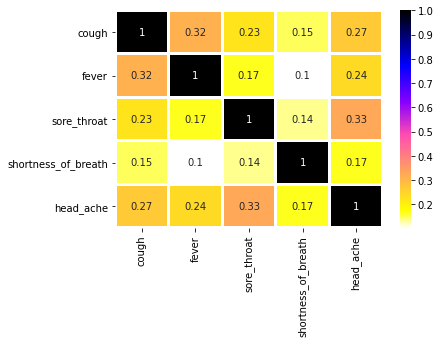

In [86]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,linewidths=2,cmap='gnuplot2_r')

In [82]:
data.corr()['cough'][1:].sort_values(ascending=False)

fever                  0.316634
head_ache              0.270590
sore_throat            0.225510
shortness_of_breath    0.151596
Name: cough, dtype: float64